# Impact of Cloud optical depth on atmospheric transmission on Radiance
=======================================================================

- Sylvie Dagoret-Campagne
- affliliation : IJCLAB/IN2P3/CNRS
- creation date :  24 January 2020
- update :  November 7th 2023
  
======================================================================


In [1]:
import sys
import os
import numpy as np

In [2]:
import matplotlib

# matplotlib.rcParams['font.family'] = 'sans-serif'
# # matplotlib.rcParams['font.sans-serif'] = ['tgheros']
# matplotlib.rcParams['font.sans-serif'] = ['helvet']
# # matplotlib.rcParams['font.serif'] = ['cm10']
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.preamble'] = r"""
# \usepackage[T1]{fontenc}
# \usepackage{amsmath}
# \usepackage{amsfonts}
# \usepackage{amssymb}
# \usepackage{tgheros}
# \usepackage[helvet]{sfmath}

# """
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

# %matplotlib widget
%matplotlib inline

In [3]:
from scipy.interpolate import interp1d

In [4]:
import time
from datetime import datetime,date
import dateutil.parser

In [5]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [6]:
from libradtranpy import libsimulateThermal

In [7]:
os.getenv('LIBRADTRANDIR')

'/home/sommer/computing/libradtran'

In [8]:
am=1.
pressure = 900.
pwv=0.0
aer=0
ozone=300.

In [9]:
#cloudext=np.linspace(0.0,0.2,10)
# cloudext=[1e-3, 2e-3, 5e-3, 1e-2, 2e-2, 5e-2, 1e-1]#np.linspace(0.,0.3,1)

In [10]:
cloudext = np.arange(0, 0.22, 0.02)

In [11]:
cloudext

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ])

In [12]:
all_temp = []
for index in range(0, len(cloudext)):

    path,thefile=libsimulateThermal.ProcessSimulation(am,pwv,ozone,pressure,
                                                      prof_str='us',proc_str='sa',cloudext=cloudext[index],
                                                      altitude_str='OHP',
                                                      thermal_output='radiance')
    print(thefile)
    data = np.loadtxt(os.path.join(path,thefile))
    wl = data[:,0]
    atm = data[:,1:] 
    all_temp.append(atm)

RT_OH_pp_us_sa_rtthermal_z10_wv100_oz30_cld0000.OUT
RT_OH_pp_us_sa_rtthermal_z10_wv100_oz30_cld0020.OUT
RT_OH_pp_us_sa_rtthermal_z10_wv100_oz30_cld0040.OUT
RT_OH_pp_us_sa_rtthermal_z10_wv100_oz30_cld0060.OUT
RT_OH_pp_us_sa_rtthermal_z10_wv100_oz30_cld0080.OUT
RT_OH_pp_us_sa_rtthermal_z10_wv100_oz30_cld0100.OUT
RT_OH_pp_us_sa_rtthermal_z10_wv100_oz30_cld0120.OUT
RT_OH_pp_us_sa_rtthermal_z10_wv100_oz30_cld0140.OUT
RT_OH_pp_us_sa_rtthermal_z10_wv100_oz30_cld0160.OUT
RT_OH_pp_us_sa_rtthermal_z10_wv100_oz30_cld0180.OUT
RT_OH_pp_us_sa_rtthermal_z10_wv100_oz30_cld0200.OUT


In [13]:
all_temp = np.array(all_temp)

In [14]:
# this array is defined (hardcoded in radiance definition in libsimulateThermal.py
# costh=np.array([1. , 0.9, 0.8,  0.7, 0.6, 0.5 , 0.4,  0.3, 0.2,  0.1 ])

In [15]:
N=len(cloudext)

In [16]:
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N-1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [17]:
cldindex = str(int(cloudext[0] * 1000))     
cld_str=cldindex.zfill(4)

In [18]:
# sys.path.append('../')
# from utilities import *

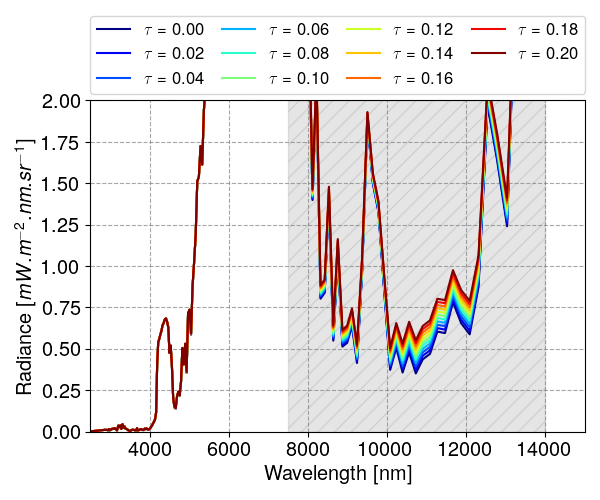

In [19]:
fig, ax = plt.subplots(figsize=(6, 5))

# Plotting the shaded area
ax.axvspan(xmin=7500, xmax=14000, color='gray', hatch='//', alpha=0.2)

# Plotting the radiance data
for index in np.arange(N):
    label = "$\\tau$ = {:.2f}".format(cloudext[index])
    ax.plot(wl, all_temp[index, :, 0]*1000, '-', color=all_colors[index], label=label)

# Grid and labels
ax.grid(True, linestyle='--', color='gray', alpha=0.7)
ax.set_xlabel("Wavelength [nm]", fontsize='x-large')
ax.set_ylabel("Radiance [$mW.m^{-2}.nm.sr^{-1}$]", fontsize='x-large')
ax.tick_params(axis='both', which='major', labelsize='x-large')
ax.set_xlim(2500, 15000)
ax.set_ylim(0, 2)

# Legend above the plot, centered horizontally
ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=4, frameon=True, fontsize='large')

# Tight layout and display the plot
fig.tight_layout()
# plt.savefig('../plots/libradtran_atm_radiance_cloud_depth.pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [20]:
# for index in np.arange(N):
#     print(integrate_libradtran_radiances(spec_radiance=all_temp[index, :, 0], total_transmission=f_instrument_throughput_no_filter(wl*1e-3), wl=wl*1e-3))

0.005804076226598267
0.005857265357908895
0.005909914413688578
0.0059620335396575585
0.006013628837487195
0.00606470635429695
0.006115272317545024
0.006165332834578336
0.006214894151392722
0.006263962100455971
0.006312542281828877
